**依赖generate_CBPs_movie_from_png.py 和 download_EUI_map_data.py**

-------

**下载EUI成像数据**

from: https://sidc.be/EUI/data/L2/2022/03/30/

"download_EUI_map_data.py"下载程序是自己写的。

也可以使用sunpy-soar程序包下载EUI maps：https://pypi.org/project/sunpy-soar/, 需要python版本>=3.9, sunpy版本>=5.0

In [1]:
import requests
from bs4 import BeautifulSoup
import datetime
import julian
from download_EUI_map_data import * # Please put "download_EUI_map_data.py" in the current directory

if __name__ == "__main__":
    
    #------------
    local_dir = '/Users/hcp/sunpy/data/'
    begin_time = datetime.datetime(2022,3,30,4,37,48)
    end_time = datetime.datetime(2022,3,30,4,37,50)
    image_type = 'hrieuvopn'  # ['hrieuv174','hrieuvopn','hrilya1216','fsi174','fsi304']
    image_level = 'L2'
    #------------
    time_range = [begin_time, end_time]
    hri174_file_list = download_file_series(time_range,image_type=image_type,image_level=image_level, local_dir=local_dir)
    
    #=============
    
    #------------
    local_dir = '/Users/hcp/sunpy/data/'
    begin_time = datetime.datetime(2022,3,30,4,20,1)
    end_time = datetime.datetime(2022,3,30,4,21,1)
    image_type = 'fsi174'  # ['hrieuv174','hrilya1216','fsi174','fsi304']
    image_level = 'L2'
    #------------
    time_range = [begin_time, end_time]
    fsi174_file_list = download_file_series(time_range,image_type=image_type,image_level=image_level, local_dir=local_dir)
    

solo_L2_eui-hrieuvopn-image_20220330T043748222_V02.fits downloaded!

All files downloaded!
solo_L2_eui-fsi174-image_20220330T042045225_V02.fits downloaded!

All files downloaded!


**画图**

更多图像处理方法，参考：https://docs.sunpy.org/en/stable/generated/gallery/index.html

In [2]:
import sys
sys.path.insert(0,'/Users/hcp/opt/anaconda3/lib/python3.8/site-packages/') #优先使用pip安装的程序包
import sunpy.map
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib notebook

EUI_fsi174_map = sunpy.map.Map(fsi174_file_list[0])
EUI_hri174_map = sunpy.map.Map(hri174_file_list[0])


**分别画hri和fsi的图**

<IPython.core.display.Javascript object>


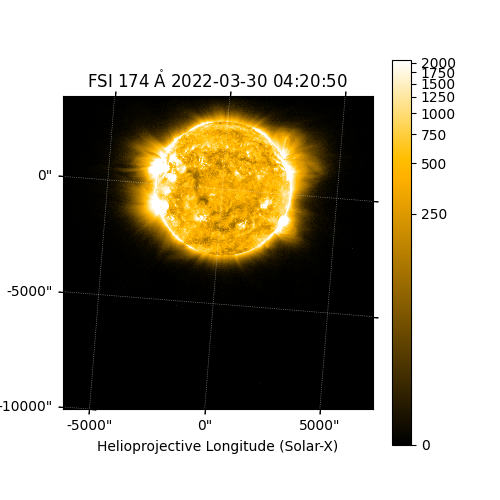

In [3]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=EUI_fsi174_map)

EUI_fsi174_map.plot(axes=ax, clip_interval=(1, 99)*u.percent)

plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


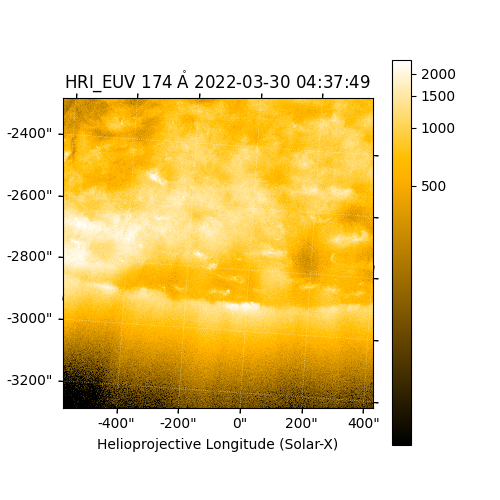

In [4]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=EUI_hri174_map)

EUI_hri174_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

plt.colorbar()
plt.show()

**将hri和fsi的图叠在一起**

<IPython.core.display.Javascript object>


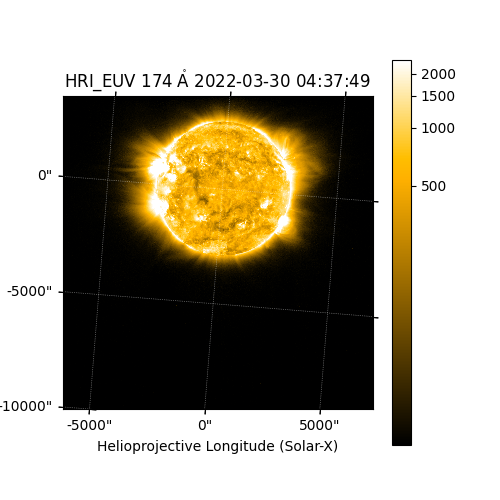

In [5]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=EUI_fsi174_map)

EUI_fsi174_map.plot(axes=ax, clip_interval=(1, 99)*u.percent)
EUI_hri174_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent,autoalign=True)

plt.colorbar()
plt.show()

**上图中，坐标网格是斜的，这是因为成像视场的y轴与太阳自转轴之间存在夹角，相机没有对正。下面进行对齐处理**

<IPython.core.display.Javascript object>


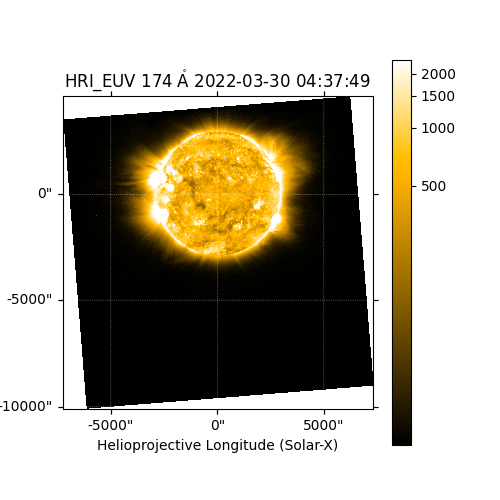

In [6]:
CROTA = EUI_fsi174_map.fits_header['CROTA']
EUI_fsi174_map_rotated=EUI_fsi174_map.rotate(angle=CROTA*u.deg)

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=EUI_fsi174_map_rotated)

EUI_fsi174_map_rotated.plot(axes=ax, clip_interval=(1, 99)*u.percent)
EUI_hri174_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent,autoalign=True)
# EUI_map.plot(vmin=1,vmax=200)
plt.colorbar()
plt.show()

**上图中，坐标范围过大，下面进行裁剪**

<IPython.core.display.Javascript object>


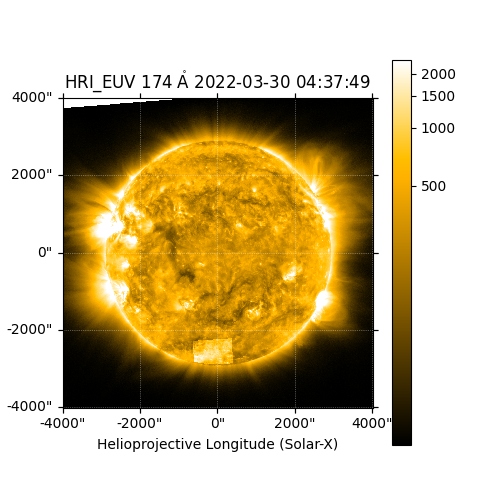

In [7]:
from astropy.coordinates import SkyCoord

bottom_left = SkyCoord(-4000 * u.arcsec, -4000 * u.arcsec, frame=EUI_fsi174_map_rotated.coordinate_frame)
top_right = SkyCoord(4000 * u.arcsec, 4000 * u.arcsec, frame=EUI_fsi174_map_rotated.coordinate_frame)

EUI_fsi174_map_rotated_clip = EUI_fsi174_map_rotated.submap(bottom_left, top_right=top_right)

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=EUI_fsi174_map_rotated_clip)

EUI_fsi174_map_rotated_clip.plot(axes=ax, clip_interval=(1, 99)*u.percent)
EUI_hri174_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent,autoalign=True)

plt.colorbar()
plt.show()

**保存图片** 

每个map文件画一张图，保存在一个单独文件夹中。

In [ ]:
plt.savefig('EUI_map_temp.png', dpi=300)

**生成动画**

读取一个文件夹中全部以png为后缀的图片，合成一个动画.

因为会读取文件夹里所有png图片，要确保文件夹中只包含所需要的图片。

In [ ]:
from generate_CBPs_movie_from_png import *

dir_input_images = './'
dir_output_video = './'
video_name = 'EUI_map_movie'
fps = 25
write_videos_from_png_images(dir_input_images=dir_input_images,\
                             dir_output_video=dir_output_video,\
                             video_name=video_name,\
                             fps=fps)